In [1]:
import pandas as pd
import numpy as np
import jieba
# csv写入dataframe
import csv
from pandas import DataFrame
pd.set_option('max_colwidth',500)

In [2]:
rows = pd.read_csv('2141comments_xingxing.csv',header=0,encoding='utf-8',dtype=str)
rows

,name,user_url,user_gender,comment_time,comment_info
0,呼呼呼小九,https://m.weibo.cn/u/3869398928?uid=3869398928,f,Tue May 30 08:35:09 +0800 2017,要是有个自杀树林就好了，每个人自己准备绳子，选择一棵喜欢的树，在阳光灿烂的下午，慢慢挣扎的死去。收尸人进来翻我的口袋，里面有遗书或家人联系电话，他会给我的妈妈打电话—“请问您是xx的妈妈吗？您的女儿刚刚自杀身亡，请过来处理后事”。
1,NaN,NaN,NaN,NaN,NaN
2,想你想给你口,https://m.weibo.cn/u/5254038954?uid=5254038954,f,Mon Mar 20 12:28:16 +0800 2017,其实挺羡慕意外死亡的
3,NaN,NaN,NaN,NaN,NaN
4,猪头翼爱吃肉,https://m.weibo.cn/u/6047920350?uid=6047920350,f,Sat Feb 25 12:08:47 +0800 2017,看了一下任航的评论和转发，好多人对他说，下辈子做个无忧无虑的人。对抑郁症患者说下辈子，真的是非常残忍了。这辈子都坚持不下去了，为什么还要有下辈子。
...,...,...,...,...,...
4276,猪头翼爱吃肉,https://m.weibo.cn/u/6047920350?uid=6047920350,f,Sun Feb 12 14:29:04 +0800 2017,好多人劝我回去 我不想回去 就算我回去了又怎样 他们只要达到他们的目的――我回去 然后剩下都是我自己面对 我累了 很累很累 回去的每一秒我都窒息般难受 怎么没有人考虑过我呢 这么想想他们真是自私
4277,NaN,NaN,NaN,NaN,NaN
4278,我們笑著撲火,https://m.weibo.cn/u/5065283956?uid=5065283956,f,Sun Feb 12 01:50:09 +0800 2017,饭 玻璃碴子也许比美工刀顺手
4279,NaN,NaN,NaN,NaN,NaN


In [3]:
# 观察数据发现有空值行，先删除
rows.dropna(axis=0, how='all', inplace=True)

In [4]:
# 将评论列转写成txt，方便后续分析
df_comments = rows[["comment_info"]]
import json
df_comments.to_csv('comments.txt',sep='\t',index=False)

In [5]:
import sys
import jieba.analyse
import codecs

In [6]:
# -*- coding: utf-8 -*-
import jieba
txt = open("comments.txt", "r", encoding='utf-8').read()
words = jieba.lcut(txt)     # 使用精确模式对文本进行分词
counts = {}     # 通过键值对的形式存储词语及其出现的次数
for word in words:
    if len(word) == 1:    # 单个词语不计算在内
        continue
    else:
        counts[word] = counts.get(word, 0) + 1    # 遍历所有词语，每出现一次其对应的值加 1
items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)    # 根据词语出现的次数进行从大到小排序
for i in range(3):
    word, count = items[i]
    print("{0:<5}{1:>5}".format(word, count))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\小冰\AppData\Local\Temp\jieba.cache
Loading model cost 0.590 seconds.
Prefix dict has been built successfully.


自己     366
没有     247
知道     185


In [12]:
import collections 
word_counts = collections.Counter(counts)       # 对分词做词频统计
word_counts_top = word_counts.most_common(200)    # 获取前100个最高频的词
print(word_counts_top)

[('自己', 366), ('没有', 247), ('知道', 185), ('一个', 184), ('真的', 183), ('什么', 182), ('还是', 131), ('不想', 128), ('现在', 118), ('时候', 110), ('可以', 108), ('觉得', 108), ('这个', 107), ('世界', 106), ('就是', 104), ('希望', 101), ('别人', 97), ('可是', 94), ('我们', 93), ('活着', 92), ('怎么', 89), ('如果', 88), ('不会', 87), ('他们', 85), ('难过', 85), ('喜欢', 80), ('为什么', 80), ('今天', 79), ('这么', 79), ('感觉', 79), ('这样', 78), ('生活', 76), ('不要', 70), ('回家', 70), ('开心', 69), ('那么', 67), ('已经', 66), ('每天', 65), ('不能', 65), ('饭饭', 64), ('痛苦', 64), ('醒醒', 63), ('因为', 62), ('自杀', 60), ('其实', 60), ('不是', 58), ('但是', 58), ('一点', 57), ('有人', 53), ('害怕', 52), ('怎么办', 51), ('讨厌', 50), ('好像', 48), ('朋友', 48), ('一样', 47), ('只是', 46), ('抑郁症', 45), ('所以', 45), ('还有', 45), ('看到', 44), ('是不是', 43), ('没意思', 43), ('难受', 41), ('应该', 41), ('大家', 41), ('总是', 41), ('很多', 40), ('好好', 39), ('人生', 39), ('想要', 38), ('不到', 38), ('事情', 38), ('一定', 37), ('不敢', 37), ('一天', 37), ('努力', 37), ('开始', 37), ('对不起', 37), ('离开', 36), ('然后', 36), ('你们', 35), ('起来'

In [18]:
import csv
Excel = open("wordfreq.csv", 'w', newline = '')   #打开表格文件，若表格文件不存在则创建
write = csv.writer(Excel)    #创建一个csv的writer对象用于写每一行内容
write.writerow(['words','freq'])  #写表格表头
item = list(word_counts.items()) #将字典转化为列表格式
item.sort(key = lambda x: x[1], reverse = True) #对列表按照第二列进行排序
for i in range(200):
    write.writerow(item[i])  #把前200词语写入表格

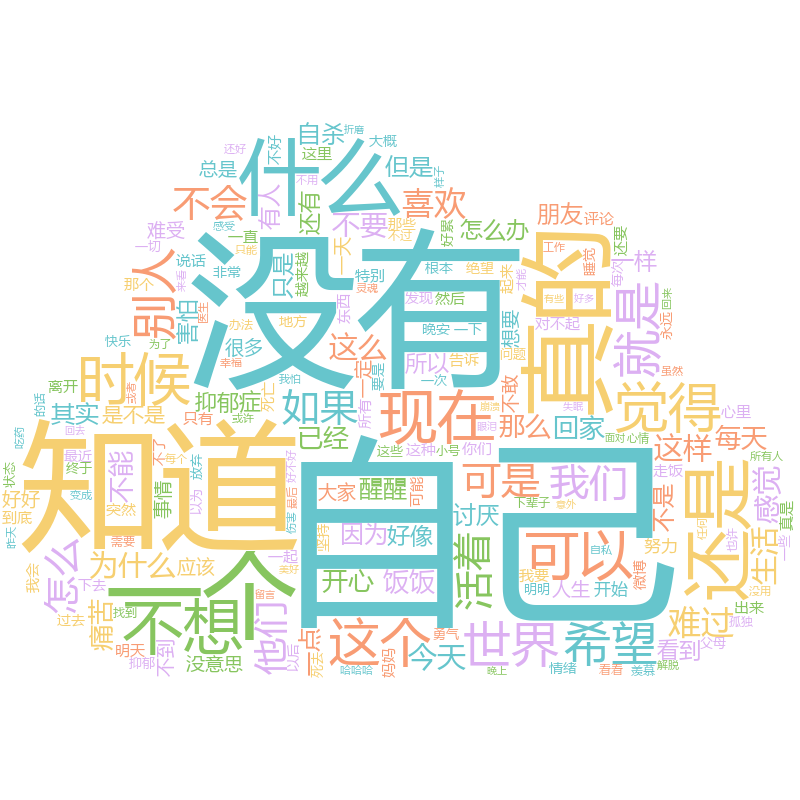

In [20]:
import stylecloud
from IPython.display import Image
stylecloud.gen_stylecloud(file_path='wordfreq.csv', collocations=False,
                          palette='cartocolors.qualitative.Pastel_5',
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-cloud',size=800,
                          output_name='word_cloud.png')
Image(filename='word_cloud.png')